# Monte Carlo Simulation - Forecasting Share Prices

The current Corona Virus outbreak has sent USA markets into turmoil. Tesla has not been spared in the market turmoil, with shares dropping as low as 361.22 since the begining of 2020 from a high of 917.42. The following exercise shows how stakeholders can forecast 10 possible trajectories of Tesla share prices using the Brownian Motion equation.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

print ("Libraries Imported")

Libraries Imported


In [2]:
ticker = "TSLA"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = '2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())  # Calculate the log returns

In [4]:
log_returns.tail()

,TSLA
Date,
2020-03-17,-0.033981
2020-03-18,-0.174763
2020-03-19,0.168795
2020-03-20,-0.000257
2020-03-23,0.015688


Text(0, 0.5, 'Share Price')

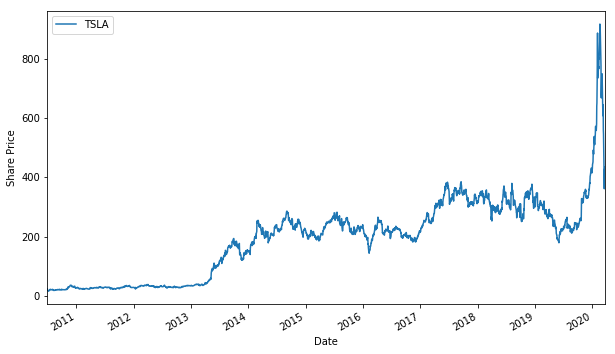

In [5]:
#The share price over time can be ploted as follows

data.plot(figsize = (10,6));
plt.ylabel("Share Price")

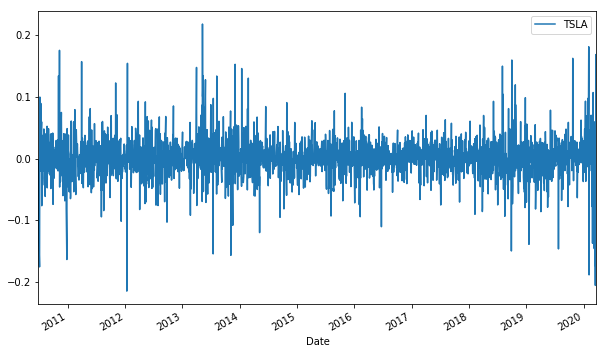

In [6]:
log_returns.plot(figsize = (10,6))  #The log returns of the shares can also be plotted and are seen to be normally distributed 

In [7]:
u = log_returns.mean()  #calculates the mean of the log returns
u

TSLA    0.001184
dtype: float64

In [8]:
var = log_returns.var()  #calculates the variance of the log returns
var

TSLA    0.001146
dtype: float64

In [9]:
drift = u - (0.5 * var)    #calculates the drift of the shares
drift

TSLA    0.000611
dtype: float64

In [10]:
stdev = log_returns.std()   #calculates the standard deviation of the log returns
stdev

TSLA    0.033853
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)  # converts drift values into a numpy array

array([0.00061124])

In [14]:
drift.values   # a second method you can use to convert drift values into a numpy array

array([0.00061124])

In [15]:
stdev.values  # converts standard deviation values into a numpy array

array([0.03385329])

In [16]:
norm.ppf(0.95)  # determines the number of standard deviations at 95% confidence

1.6448536269514722

In [17]:
x = np.random.rand(10,2)
x

array([[0.79579631, 0.13967979],
       [0.81516745, 0.19817049],
       [0.67667025, 0.76395921],
       [0.80113973, 0.21057173],
       [0.12711546, 0.14853519],
       [0.72974379, 0.51204614],
       [0.26680833, 0.1874019 ],
       [0.27497448, 0.30410262],
       [0.39244641, 0.80060812],
       [0.66099792, 0.09408708]])

In [18]:
norm.ppf(x)

array([[ 0.82669954, -1.08175913],
       [ 0.89710085, -0.84817419],
       [ 0.4584078 ,  0.7190963 ],
       [ 0.84569927, -0.80443903],
       [-1.14013294, -1.04273641],
       [ 0.61203828,  0.03019978],
       [-0.62249466, -0.88751109],
       [-0.59783662, -0.51263703],
       [-0.27294847,  0.84379536],
       [ 0.41518817, -1.31599967]])

In [19]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.50549761, -1.62761536],
       [ 0.51764912, -0.20176007],
       [ 0.32774175,  2.19951211],
       [-0.63460285,  1.22141802],
       [ 0.79595454, -1.65134043],
       [-0.82097444, -1.23672375],
       [-0.80369884,  0.24397866],
       [ 0.16493169, -1.47822428],
       [-2.0507167 , -0.23331329],
       [ 1.53051273,  0.77320212]])

In [20]:
t_intervals = 1000   # the number of days we are forecasting for
iterations = 10     # the number of possible outcomes we would like to see

In [21]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[0.9943692 , 0.96349516, 1.00113065, ..., 1.00040213, 0.98755521,
        1.06500993],
       [1.00762503, 1.02545715, 0.9980366 , ..., 0.96584467, 1.04677989,
        1.01280334],
       [0.97630927, 1.01218674, 0.98711132, ..., 0.9829205 , 0.98421569,
        0.96039421],
       ...,
       [1.04081962, 1.00590959, 0.99905165, ..., 0.97287714, 1.00212172,
        0.99781397],
       [0.97564675, 0.95775897, 1.04886628, ..., 1.01359635, 1.01844057,
        0.93204937],
       [1.02343486, 1.01186142, 1.02182687, ..., 1.0487753 , 0.95255268,
        0.97080595]])

In [23]:
# setting the starting price of our forecast

S0 = data.iloc[-1]
S0

TSLA    434.290009
Name: 2020-03-23 00:00:00, dtype: float64

In [24]:
#creating a new array with the same dimensions as  daily_returns

price_list = np.zeros_like(daily_returns)   

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# setting the base price of the array based on current share price today

price_list[0] = S0
price_list

array([[434.29000854, 434.29000854, 434.29000854, ..., 434.29000854,
        434.29000854, 434.29000854],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[ 434.29000854,  434.29000854,  434.29000854, ...,  434.29000854,
         434.29000854,  434.29000854],
       [ 437.6014841 ,  445.34579611,  433.43732548, ...,  419.45669205,
         454.60604679,  439.85037067],
       [ 427.23438639,  450.77311009,  427.85089212, ...,  412.29257957,
         447.43040356,  422.42975095],
       ...,
       [2107.82029064,  679.83311621,   83.63576271, ...,  815.43369379,
        1695.00596864, 2193.46896185],
       [2056.48802663,  651.11626317,   87.72273146, ...,  826.52061259,
        1726.26283956, 2044.42137231],
       [2104.68153847,  658.83942548,   89.6374441 , ...,  866.83440446,
        1644.3562908 , 1984.73643365]])

Text(0.5, 1.0, 'Tesla Share Price Forecast')

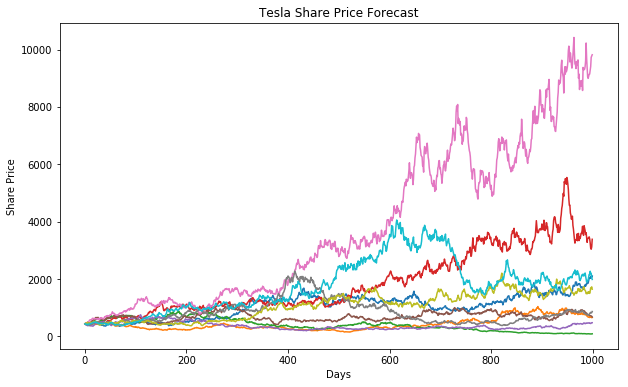

In [29]:
plt.figure(figsize = (10,6))
plt.plot(price_list);
plt.ylabel("Share Price")
plt.xlabel ("Days")
plt.title("Tesla Share Price Forecast")